In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cycler
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('df1.csv')
df

,year,vwretd,vwretx,vwRetd,vwRetx,rf,Rf,DP,DG
0,1926,0.098479,0.043034,1.098479,1.043034,0.0351,1.0351,0.053157,NaN
1,1927,0.328716,0.266477,1.328716,1.266477,0.0307,1.0307,0.049143,1.170843
2,1928,0.391397,0.337056,1.391397,1.337056,0.0317,1.0317,0.040642,1.105764
3,1929,-0.150955,-0.182395,0.849045,0.817605,0.0426,1.0426,0.038454,0.773579
4,1930,-0.289005,-0.321455,0.710995,0.678545,0.0303,1.0303,0.047823,0.843870
...,...,...,...,...,...,...,...,...,...
89,2015,-0.015995,-0.037069,0.984005,0.962931,0.0003,1.0003,0.021885,1.008804
90,2016,0.129461,0.104250,1.129461,1.104250,0.0023,1.0023,0.022831,1.151962
91,2017,0.209028,0.184488,1.209028,1.184488,0.0051,1.0051,0.020718,1.074860
92,2018,-0.061828,-0.081145,0.938172,0.918855,0.0132,1.0132,0.021023,0.932386


In [3]:
from functools import reduce
for j in range(1, 11):
    df['Rtt{}'.format(j)] = reduce(lambda x, y: x * y, [df['vwRetd'].shift(-i) for i in range(1, j + 1)])
    df['Rftt{}'.format(j)] = reduce(lambda x, y: x * y, [df['Rf'].shift(-i) for i in range(1, j + 1)])
    df['ExRtt{}'.format(j)] = df['Rtt{}'.format(j)] - df['Rftt{}'.format(j)]
    df['DGt{}'.format(j)] = reduce(lambda x, y: x * y, [df['DG'].shift(-i) for i in range(1, j + 1)])

In [4]:
df

,year,vwretd,vwretx,vwRetd,vwRetx,rf,Rf,DP,DG,Rtt1,...,ExRtt8,DGt8,Rtt9,Rftt9,ExRtt9,DGt9,Rtt10,Rftt10,ExRtt10,DGt10
0,1926,0.098479,0.043034,1.098479,1.043034,0.0351,1.0351,0.053157,NaN,1.328716,...,-0.263007,0.496596,1.349791,1.193765,0.156026,0.694782,1.785981,1.195556,0.590424,0.933646
1,1927,0.328716,0.266477,1.328716,1.266477,0.0307,1.0307,0.049143,1.170843,1.391397,...,-0.142347,0.593403,1.344140,1.159946,0.184194,0.797414,0.879009,1.161338,-0.282329,0.626722
2,1928,0.391397,0.337056,1.391397,1.337056,0.0317,1.0317,0.040642,1.105764,0.849045,...,-0.158269,0.721143,0.631745,1.125654,-0.493909,0.566778,0.811388,1.126893,-0.315505,0.543062
3,1929,-0.150955,-0.182395,0.849045,0.817605,0.0426,1.0426,0.038454,0.773579,0.710995,...,-0.335595,0.732669,0.955648,1.080849,-0.125201,0.702013,0.973265,1.081173,-0.107908,0.756920
4,1930,-0.289005,-0.321455,0.710995,0.678545,0.0303,1.0303,0.047823,0.843870,0.556127,...,0.295037,0.831897,1.368877,1.049377,0.319501,0.896963,1.266069,1.049796,0.216273,0.962655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2015,-0.015995,-0.037069,0.984005,0.962931,0.0003,1.0003,0.021885,1.008804,1.129461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2016,0.129461,0.104250,1.129461,1.104250,0.0023,1.0023,0.022831,1.151962,1.209028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,2017,0.209028,0.184488,1.209028,1.184488,0.0051,1.0051,0.020718,1.074860,0.938172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,2018,-0.061828,-0.081145,0.938172,0.918855,0.0132,1.0132,0.021023,0.932386,1.297513,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
estimator = []
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['Rtt{}'.format(j), 'DP']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Dependent variable (nparray)
    Y = np.array(sample['Rtt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample['DP'])[:, np.newaxis]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit(cov_type = 'HC0')
    estimator.append(result.params[1])
    print('b:', result.params[1], 't-stats:', result.tvalues[1], 'R^2:', result.rsquared)

b: 2.973802889501734 t-stats: 2.317151799703189 R^2: 0.05067167944270068
b: 5.914178319943425 t-stats: 3.4513588375150097 R^2: 0.08640714308618669
b: 8.8603650194292 t-stats: 3.657121403763723 R^2: 0.1270368199521279
b: 12.44800926355134 t-stats: 3.85494765471727 R^2: 0.15244481415563937
b: 14.648046571125175 t-stats: 4.524846645308142 R^2: 0.15046459267985968
b: 18.435972615033364 t-stats: 5.07998871933239 R^2: 0.18522018494043802
b: 23.746145867613706 t-stats: 5.883452205578112 R^2: 0.2270863741919691
b: 29.603692376285874 t-stats: 6.732584423716196 R^2: 0.24728758111287374
b: 36.00285189793892 t-stats: 6.936361736382411 R^2: 0.2704202122192778
b: 44.33362197312752 t-stats: 6.968373033822602 R^2: 0.2914025699883762


In [6]:
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['ExRtt{}'.format(j), 'DP']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Dependent variable (nparray)
    Y = np.array(sample['ExRtt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample['DP'])[:, np.newaxis]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit(cov_type = 'HC0')
    print('b:', result.params[1], 't-stats:', result.tvalues[1], 'R^2:', result.rsquared)

b: 3.1142933184048385 t-stats: 2.370276045355324 R^2: 0.05398681999240307
b: 6.1734656475047425 t-stats: 3.4141700438889666 R^2: 0.0906300089770199
b: 9.2284544271197 t-stats: 3.523839985262789 R^2: 0.13229359489879322
b: 12.933744644463484 t-stats: 3.68911921945498 R^2: 0.15920859498876228
b: 15.294007648015807 t-stats: 4.40717243329308 R^2: 0.16188284738727765
b: 19.284442614770803 t-stats: 5.034719894154209 R^2: 0.20395854206613728
b: 24.837099512277348 t-stats: 5.9968617306753575 R^2: 0.2542709231103525
b: 31.031122102661428 t-stats: 6.902868533083694 R^2: 0.2808048226698582
b: 37.95894569781892 t-stats: 7.313415274155844 R^2: 0.3141275999228289
b: 46.863720045465165 t-stats: 7.40663310727222 R^2: 0.3410622855709655


In [7]:
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['DGt{}'.format(j), 'DP']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Dependent variable (nparray)
    Y = np.array(sample['DGt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample['DP'])[:, np.newaxis]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit(cov_type = 'HC0')
    print('b:', result.params[1], 't-stats:', result.tvalues[1], 'R^2:', result.rsquared)

b: -0.2683661318128894 t-stats: -0.2642092928203914 R^2: 0.0007287118702804518
b: -0.9598454312267922 t-stats: -0.6792766665113376 R^2: 0.00462514184130669
b: -1.4147668435298784 t-stats: -0.8887123944264246 R^2: 0.0072663223747050365
b: -1.6313720515956462 t-stats: -0.8386978905395047 R^2: 0.006526100414091851
b: -2.0431655151546018 t-stats: -1.0028850705934713 R^2: 0.008068426886596591
b: -2.616425625747145 t-stats: -1.2428971644772444 R^2: 0.011712457252238906
b: -2.6869214094916147 t-stats: -1.1401700136334827 R^2: 0.010710594733399637
b: -2.4119616616023944 t-stats: -0.9401283013226749 R^2: 0.007349711233084144
b: -2.842325554562864 t-stats: -1.0173359791545036 R^2: 0.009422891901667452
b: -3.1243378025596513 t-stats: -1.07570238990488 R^2: 0.009904878629905967


### Hansen-Hodrick Errors

In [8]:
def HH_se(X, resid, maxlags):
    X_ = X * resid[:, np.newaxis]
    s = np.dot(X_.transpose(), X_) / X_.shape[0]
    if maxlags > 0:
        s += 2 * sum(np.dot(X_[: -j].transpose(), X_[j:]) / (X_.shape[0]) for j in range(1, maxlags + 1))
    sxx = np.linalg.inv(np.dot(X.transpose(), X) / X.shape[0])
    se = np.dot(np.dot(sxx, s), sxx) / X.shape[0]
    return np.sqrt(np.diag(se))

In [9]:
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['Rtt{}'.format(j), 'DP']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Dependent variable (nparray)
    Y = np.array(sample['Rtt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample['DP'])[:, np.newaxis]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    print('t-stats:', result.params[1] / HH_se(X, result.resid, j - 1)[1])

t-stats: 2.3171517997031903
t-stats: 2.703466774124012
t-stats: 2.924956551628272
t-stats: 3.062147681117187
t-stats: 3.0900154327819602
t-stats: 2.7120978027482274
t-stats: 2.9306134993479187
t-stats: 3.1451106149638313
t-stats: 3.0801210368651604
t-stats: 3.246823256524413


### Newey-West

In [10]:
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['Rtt{}'.format(j), 'DP']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Dependent variable (nparray)
    Y = np.array(sample['Rtt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample['DP'])[:, np.newaxis]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit(cov_type='HAC',cov_kwds={'maxlags': j - 1})
    print('b:', result.params[1], 't-stats:', result.tvalues[1])

b: 2.973802889501734 t-stats: 2.31715179970319
b: 5.914178319943425 t-stats: 3.0098341214901305
b: 8.8603650194292 t-stats: 3.064964917537928
b: 12.44800926355134 t-stats: 3.1446995747215047
b: 14.648046571125175 t-stats: 3.272721044301967
b: 18.435972615033364 t-stats: 3.15347787181945
b: 23.746145867613706 t-stats: 3.441614177224303
b: 29.603692376285874 t-stats: 3.7101667563614966
b: 36.00285189793892 t-stats: 3.6910648658567333
b: 44.33362197312752 t-stats: 3.7655635987884932


### Non-overlapping sample

In [11]:
for j in range(1, 11):
    # Extract the regression sample
    sample = df[['Rtt{}'.format(j), 'DP']].copy()
    # Drop the rows where at least one element is missing
    sample.dropna(inplace = True)
    # Extract non-overlap sample
    sample = sample.iloc[::j, :].copy()
    # Dependent variable (nparray)
    Y = np.array(sample['Rtt{}'.format(j)])[:, np.newaxis]
    # Independent variables (nparray)
    X = np.array(sample['DP'])[:, np.newaxis]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit(cov_type='HC0')
    print('t:', estimator[j - 1] / result.bse[1])

t: 2.317151799703189
t: 2.2690565407981222
t: 2.387440298012733
t: 2.158655272854595
t: 2.0216933892640427
t: 2.3503927309636143
t: 2.003359636017397
t: 3.5272214057972264
t: 2.538836247238109
t: 1.657326662411659


### Plot

In [12]:
# Extract the regression sample
sample = df[['Rtt7', 'DP']].copy()
# Drop the rows where at least one element is missing
sample.dropna(inplace = True)
# Dependent variable (nparray)
Y = np.array(sample['Rtt7'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(sample['DP'])[:, np.newaxis]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit(cov_type = 'HC0')
fit = result.fittedvalues

sample = df[['year', 'Rtt7']].dropna()
sample['fit'] = fit
sample

,year,Rtt7,fit
0,1926,0.899380,2.437868
1,1927,0.698433,2.342551
2,1928,0.730102,2.140681
3,1929,1.137792,2.088713
4,1930,1.046513,2.311194
...,...,...,...
82,2008,2.561139,1.739079
83,2009,2.197847,1.770805
84,2010,2.253973,1.686981
85,2011,2.133801,1.674375


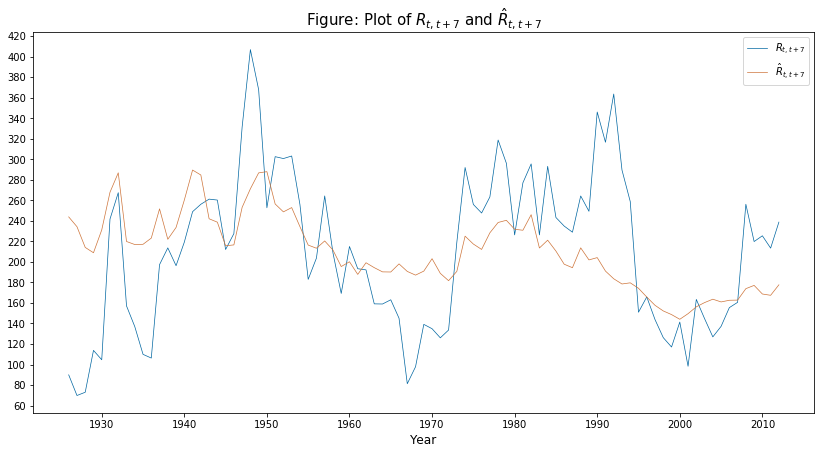

In [13]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#31686c', '#853c42', '#b85696']))

# Call plot() method on the appropriate object
ax.plot(sample['year'], sample['Rtt7'] * 100, linewidth=0.7, label=r'$R_{t,t+7}$')
ax.plot(sample['year'], (sample['fit']) * 100, linewidth=0.7, label=r'$\hat{R}_{t,t+7}$')

ax.set_xlabel('Year', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.legend()
ax.set_title(r'Figure: Plot of $R_{t,t+7}$ and $\hat{R}_{t,t+7}$', fontsize = 15);

In [14]:
fig.savefig('q2fig1.pdf', format = 'pdf')

In [15]:
# Extract the regression sample
sample = df[['DGt7', 'DP']].copy()
# Drop the rows where at least one element is missing
sample.dropna(inplace = True)
# Dependent variable (nparray)
Y = np.array(sample['DGt7'])[:, np.newaxis]
# Independent variables (nparray)
X = np.array(sample['DP'])[:, np.newaxis]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit(cov_type = 'HC0')
fit = result.fittedvalues

sample = df[['year', 'DGt7']].dropna()
sample['fit'] = fit
sample

,year,DGt7,fit
0,1926,0.516338,1.427572
1,1927,0.424135,1.438357
2,1928,0.536646,1.461199
3,1929,0.932217,1.467079
4,1930,0.868225,1.441905
...,...,...,...
82,2008,2.021639,1.506641
83,2009,1.717112,1.503051
84,2010,1.861397,1.512536
85,2011,1.833265,1.513963


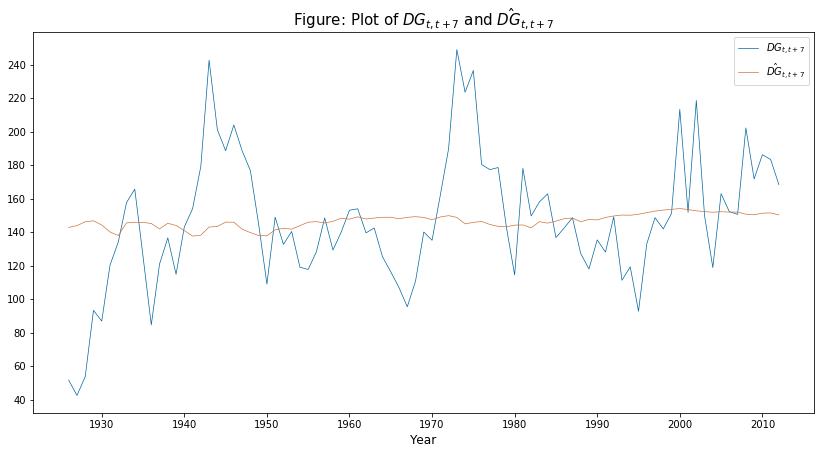

In [16]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#31686c', '#853c42', '#b85696']))

# Call plot() method on the appropriate object
ax.plot(sample['year'], sample['DGt7'] * 100, linewidth=0.7, label=r'$DG_{t,t+7}$')
ax.plot(sample['year'], (sample['fit']) * 100, linewidth=0.7, label=r'$\hat{DG}_{t,t+7}$')

ax.set_xlabel('Year', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.legend()
ax.set_title(r'Figure: Plot of $DG_{t,t+7}$ and $\hat{DG}_{t,t+7}$', fontsize = 15);

In [17]:
fig.savefig('q2fig2.pdf', format = 'pdf')